# Part 1: Prepare the Data

In [1]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
#Read in myopia.csv as DataFrame

myopia = pd.read_csv("Resources/myopia.csv")
myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
#Remove "MYOPIC" column from dataset

labels = myopia['MYOPIC']
myopia = myopia.drop("MYOPIC", axis=1)
myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
#Standardise your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

X_scaled = StandardScaler().fit_transform(myopia)
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [5]:
#Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=0.9)

# Get principal components for the myopia data.
myopia_pca = pca.fit_transform(X_scaled)

#The shape of the reduced dataset is examined for reduction in number of features
myopia_pca.shape

(618, 10)

In [6]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features.shape

C:\Users\carlv\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [7]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=tsne_features, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca

,principal component 1,principal component 2
0,16.190783,-17.791067
1,-2.812213,-6.463081
2,3.194191,18.436764
3,-25.445923,12.433836
4,25.539835,-6.584778
...,...,...
613,4.889069,-17.067564
614,-2.419028,-6.912358
615,-1.171478,-7.043494
616,-4.132441,22.910471


In [8]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?

# The first column of transformed features
df_myopia_pca['principal component 1'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['principal component 2'] = tsne_features[:,1]

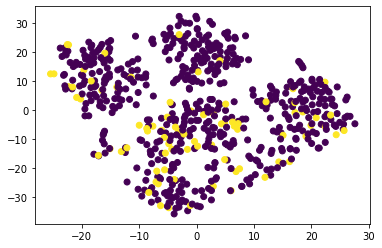

In [10]:

plt.scatter(df_myopia_pca['principal component 1'], df_myopia_pca['principal component 2'], c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [11]:
#Use a for loop to determine the inertia for each k between 1 through 10.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot. If possible, determine where the elbow of the plot is, and at which value of k it appears.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\carlv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


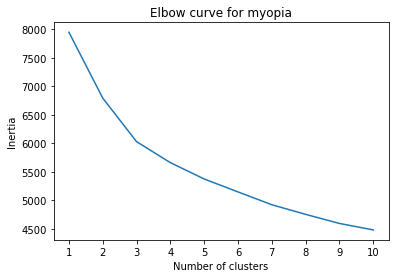

In [12]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia')
plt.show()